In [1]:
import json
import pandas as pd
import os

In [2]:
# Get data path
data_path = os.path.join(os.getcwd(), os.pardir, 'data')
print(os.path.abspath(data_path))

/home/zack/Projects/datasci-test/data


In [3]:
# Get video info
data = pd.read_json(data_path+"/WLASL_v0.3.json")
data

,gloss,instances
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra..."
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f..."
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
...,...,...
1995,washington,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
1996,waterfall,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
1997,weigh,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
1998,wheelchair,"[{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f..."


In [4]:
# get each gloss
print(data.iloc[0])
book = data.iloc[0]['instances']
book

gloss                                                     book
instances    [{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...
Name: 0, dtype: object


[{'bbox': [385, 37, 885, 720],
  'fps': 25,
  'frame_end': -1,
  'frame_start': 1,
  'instance_id': 0,
  'signer_id': 118,
  'source': 'aslbrick',
  'split': 'train',
  'url': 'http://aslbricks.org/New/ASL-Videos/book.mp4',
  'variation_id': 0,
  'video_id': '69241'},
 {'bbox': [190, 25, 489, 370],
  'fps': 25,
  'frame_end': -1,
  'frame_start': 1,
  'instance_id': 1,
  'signer_id': 90,
  'source': 'aslsignbank',
  'split': 'train',
  'url': 'https://aslsignbank.haskins.yale.edu/dictionary/protected_media/glossvideo/ASL/BO/BOOK-418.mp4',
  'variation_id': 0,
  'video_id': '65225'},
 {'bbox': [262, 1, 652, 480],
  'fps': 25,
  'frame_end': -1,
  'frame_start': 1,
  'instance_id': 2,
  'signer_id': 110,
  'source': 'valencia-asl',
  'split': 'train',
  'url': 'https://www.youtube.com/watch?v=0UsjUE-TXns',
  'variation_id': 0,
  'video_id': '68011'},
 {'bbox': [123, 19, 516, 358],
  'fps': 25,
  'frame_end': 60,
  'frame_start': 1,
  'instance_id': 3,
  'signer_id': 113,
  'source': 'lil

# Instances Analysis

## Video Count

In [5]:
# Create freq list
length = data.shape[0]
freq = []

for i in range(length):
    row = data.iloc[i]
    freq.append([row['gloss'],len(row['instances'])])

# Check whether or not word count == 2000
len(freq)

2000

In [6]:
freq_df = pd.DataFrame(freq, columns=['gloss','instances_freq'])
freq_df

,gloss,instances_freq
0,book,40
1,drink,35
2,computer,30
3,before,26
4,chair,26
...,...,...
1995,washington,7
1996,waterfall,7
1997,weigh,7
1998,wheelchair,7


In [7]:
freq_df.sum()

gloss             bookdrinkcomputerbeforechairgoclotheswhocandyc...
instances_freq                                                21083
dtype: object

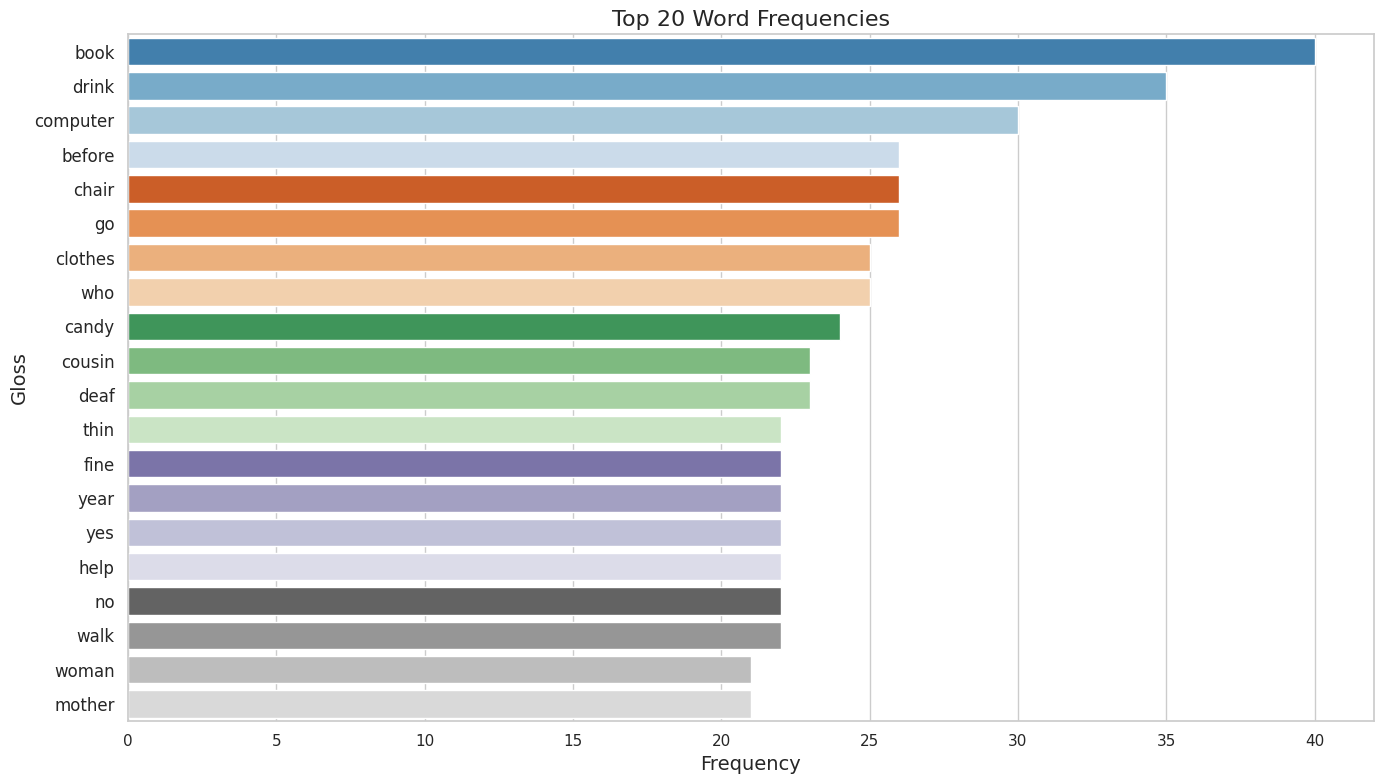

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the data in descending order of frequency
freq_df = freq_df.sort_values(by='instances_freq', ascending=False)

# Create a Seaborn bar plot
plt.figure(figsize=(14, 8))  # Increase figure size
sns.set(style="whitegrid")

# Create the bar plot and set the font size for labels
ax = sns.barplot(x='instances_freq', y='gloss', data=freq_df[0:20], palette="tab20c")
ax.tick_params(axis='y', labelsize=12)  # Increase font size for y-axis labels

plt.xlabel('Frequency', fontsize=14)  # Increase font size for x-axis label
plt.ylabel('Gloss', fontsize=14)  # Increase font size for y-axis label
plt.title('Top 20 Word Frequencies', fontsize=16)  # Increase font size for title

# Rotate y-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

## Source

In [52]:
from collections import Counter

source_list = [[instance["source"] for instance in data.iloc[i]['instances']] for i in range(data.shape[0])]
flat_source_list = [source for sources in source_list for source in sources]
print(f"The video sources count: {len(flat_source_list)}")

The video sources count: 21083


In [53]:
source_freq = Counter(flat_source_list)
print(source_freq)

Counter({'signingsavvy': 2668, 'handspeak': 2211, 'signschool': 1968, 'aslsearch': 1875, 'asldeafined': 1833, 'aslu': 1827, 'aslpro': 1736, 'spreadthesign': 1584, 'asl5200': 1561, 'aslsignbank': 1071, 'asllex': 814, 'startasl': 623, 'northtexas': 295, 'lillybauer': 269, 'aslbrick': 218, 'nabboud': 200, 'elementalasl': 161, 'valencia-asl': 133, 'scott': 36})


In [54]:
source_freq_df = pd.DataFrame.from_dict(source_freq, orient='index', columns=['Frequency']).reset_index()
source_freq_df = source_freq_df.rename(columns={'index': 'Source'})
source_freq_df

,Source,Frequency
0,aslbrick,218
1,aslsignbank,1071
2,valencia-asl,133
3,lillybauer,269
4,northtexas,295
5,aslpro,1736
6,signschool,1968
7,startasl,623
8,asldeafined,1833
9,aslsearch,1875


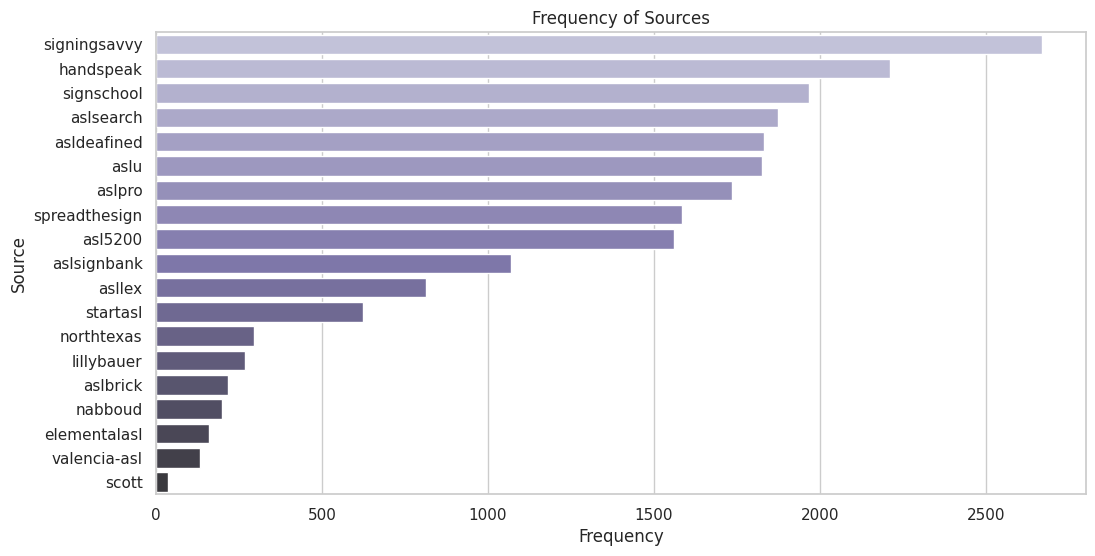

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

source_freq_df = source_freq_df.sort_values(by='Frequency', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='Frequency', y='Source', data=source_freq_df, palette="Purples_d")
plt.xlabel('Frequency')
plt.ylabel('Source')
plt.title('Frequency of Sources')
plt.show()

## FPS

In [56]:
from collections import Counter

fps_list = [[instance["fps"] for instance in data.iloc[i]['instances']] for i in range(data.shape[0])]
flat_fps_list = [f for fps in fps_list for f in fps]
print(f"The video fps count: {len(flat_fps_list)}")

The video fps count: 21083


In [57]:
fps_freq = Counter(flat_fps_list)
print(fps_freq)

Counter({25: 21083})


Therefore, every video have 25 fps.

In [58]:
from collections import Counter

split_list = [[instance["split"] for instance in data.iloc[i]['instances']] for i in range(data.shape[0])]
flat_split_list = [split for splits in split_list for split in splits]
print(f"The video split count: {len(flat_split_list)}")

The video split count: 21083


In [59]:
split_freq = Counter(flat_split_list)
print(split_freq)

Counter({'train': 14289, 'val': 3916, 'test': 2878})


In [60]:
split_freq_df = pd.DataFrame.from_dict(split_freq, orient='index', columns=['Frequency']).reset_index()
split_freq_df = split_freq_df.rename(columns={'index': 'Split'})
split_freq_df

,Split,Frequency
0,train,14289
1,val,3916
2,test,2878


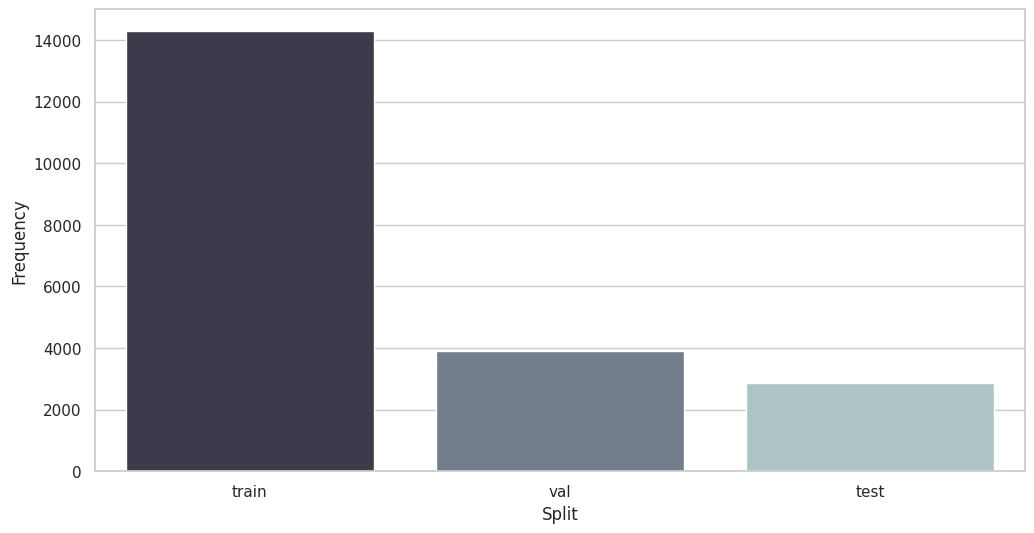

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='Split', y='Frequency', data=split_freq_df, palette="bone")
plt.show()

# Etc

In [13]:
for i in range(length):
    row = data.iloc[i]
    for j in range(len(row['instances'])):
        print(f"loc:({i},{j}) "+row['gloss'],row['instances'][j]['video_id'])

loc:(0,0) book 69241
loc:(0,1) book 65225
loc:(0,2) book 68011
loc:(0,3) book 68208
loc:(0,4) book 68012
loc:(0,5) book 70212
loc:(0,6) book 70266
loc:(0,7) book 07085
loc:(0,8) book 07086
loc:(0,9) book 07087
loc:(0,10) book 07069
loc:(0,11) book 07088
loc:(0,12) book 07089
loc:(0,13) book 07090
loc:(0,14) book 07091
loc:(0,15) book 07092
loc:(0,16) book 07093
loc:(0,17) book 07068
loc:(0,18) book 07094
loc:(0,19) book 07095
loc:(0,20) book 07096
loc:(0,21) book 07097
loc:(0,22) book 07070
loc:(0,23) book 07098
loc:(0,24) book 07099
loc:(0,25) book 07071
loc:(0,26) book 07072
loc:(0,27) book 07073
loc:(0,28) book 67424
loc:(0,29) book 07074
loc:(0,30) book 07075
loc:(0,31) book 07076
loc:(0,32) book 07077
loc:(0,33) book 07078
loc:(0,34) book 07079
loc:(0,35) book 07080
loc:(0,36) book 07081
loc:(0,37) book 07082
loc:(0,38) book 07083
loc:(0,39) book 07084
loc:(1,0) drink 69302
loc:(1,1) drink 65539
loc:(1,2) drink 70173
loc:(1,3) drink 68538
loc:(1,4) drink 68042
loc:(1,5) drink 6866

In [14]:
video_id_loc = []
for i in range(length):
    row = data.iloc[i]
    for j in range(len(row['instances'])):
        video_id_loc.append([i,j,row['instances'][j]['video_id']])